In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50

In [2]:
# Paths to your dataset folders for training, validation, and testing
train_class_paths = [
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\trainp\0p", 
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\trainp\1p", 
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\trainp\2p", 
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\trainp\3p", 
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\trainp\4p"
]

val_class_paths = [
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\valp\0p", 
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\valp\1p", 
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\valp\2p", 
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\valp\3p", 
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\valp\4p"
]

test_class_paths = [
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\testp\0p", 
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\testp\1p", 
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\testp\2p", 
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\testp\3p", 
    r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\testp\4p"
]

In [3]:
# Set some constants
img_size = 224  # Resize images to 224x224 for ResNet
num_classes = 5  # We have 5 classes

In [4]:
# Initialize arrays for storing data and labels for training, validation, and testing
X_train, y_train = [], []
X_val, y_val = [], []
X_test, y_test = [], []

In [8]:
# Function to load only a limited number of images from a given class path
def load_data(class_paths, X, y, max_images_per_class):
    for class_label, folder in enumerate(class_paths):
        img_names = os.listdir(folder)[:max_images_per_class]  # Select only the first max_images_per_class images
        for img_name in img_names:
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)  # Load image in color
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))  # Resize image
                X.append(img)
                y.append(class_label)

# Load training, validation, and test data with a maximum of 300 images per class
load_data(train_class_paths, X_train, y_train, max_images_per_class=300)
load_data(val_class_paths, X_val, y_val, max_images_per_class=300)
load_data(test_class_paths, X_test, y_test, max_images_per_class=300)

In [9]:
# Load training, validation, and test data with a maximum of 300 images per class
load_data(train_class_paths, X_train, y_train, max_images_per_class=300)
load_data(val_class_paths, X_val, y_val, max_images_per_class=300)
load_data(test_class_paths, X_test, y_test, max_images_per_class=300)

In [10]:

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [11]:
# Normalize pixel values (scale between 0 and 1)
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [12]:
# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

In [13]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

In [14]:

# Load the ResNet50 model with pre-trained weights, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))


In [15]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [16]:
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(num_classes, activation='softmax')(x)

In [17]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [20]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=25,
    callbacks=[early_stopping]
)

C:\Users\C RISHI VARDHAN REDD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 410s 3s/step - accuracy: 0.2015 - loss: 1.8435 - val_accuracy: 0.1328 - val_loss: 1.5644
Epoch 2/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 397s 3s/step - accuracy: 0.2277 - loss: 1.6338 - val_accuracy: 0.1917 - val_loss: 1.5239
Epoch 3/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.2220 - loss: 1.6095 - val_accuracy: 0.2657 - val_loss: 1.5076
Epoch 4/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 378s 3s/step - accuracy: 0.2126 - loss: 1.6030 - val_accuracy: 0.3772 - val_loss: 1.4968
Epoch 5/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 420s 3s/step - accuracy: 0.2463 - loss: 1.5998 - val_accuracy: 0.3772 - val_loss: 1.5032
Epoch 6/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 368s 3s/step - accuracy: 0.2182 - loss: 1.6001 - val_accuracy: 0.2406 - val_loss: 1.5122
Epoch 7/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 403s 3s/step - accuracy: 0.2341 - loss: 1.5913 - val_accuracy: 0.3647 - val_loss: 1.4767
Epoch 8/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 378s 3s/step - accuracy: 0.2355 - loss: 1.5851 - val_accu

In [21]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')


110/110 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.3391 - loss: 1.4643
Test accuracy: 29.91%


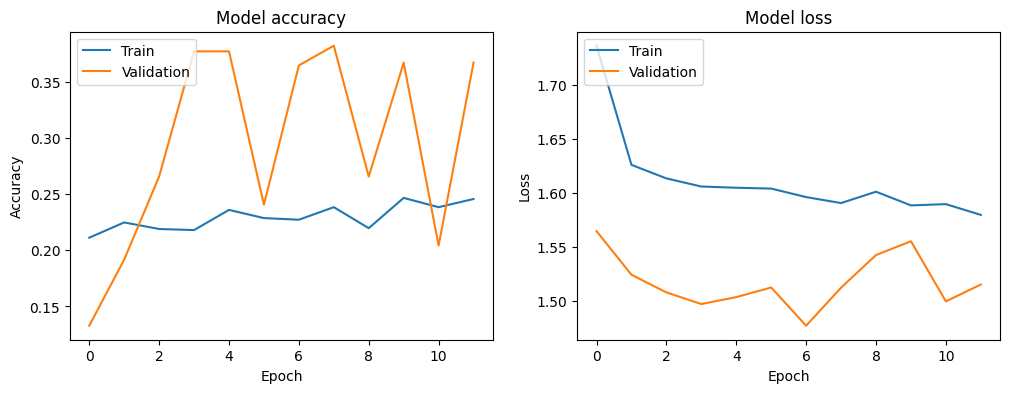

In [22]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [24]:
# Predict the labels for the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded test labels to class labels


110/110 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step


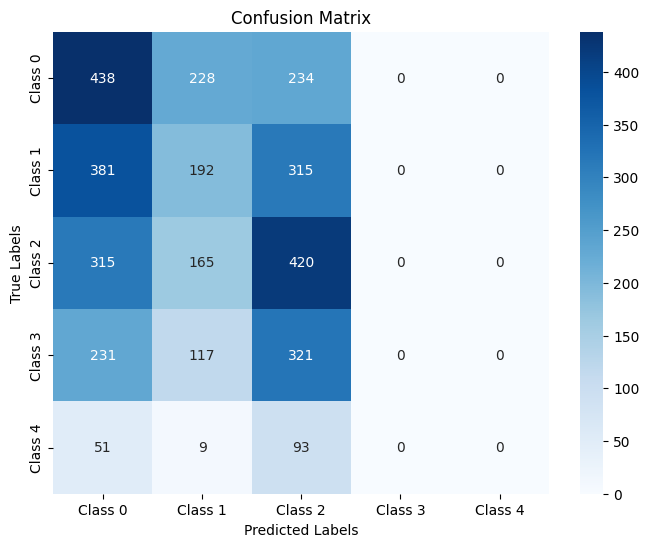

In [25]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)], yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()